In [132]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# #  maps
# import folium
# from folium.plugins import MarkerCluster

import os
import numpy as np


In [133]:
df = pd.read_csv('/content/drive/My Drive/Dataset/bottle.csv')
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,NaN,25.64900,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.640,233.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,NaN,25.65600,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.650,232.5,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,NaN,25.65400,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.650,232.8,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,NaN,25.64300,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.640,234.1,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,NaN,25.64300,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.640,234.0,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,5.805,23.87055,108.74,253.47,NaN,7,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.02,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,1.8,0.22,0.1,0.03,0.02,0.91,0.18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,108.74,253.47,4.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.905,NaN,0.176,NaN,0.22,NaN,1.77,NaN,0.029,NaN,0.10,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,1.8,0.22,0.1,0.03,0.00,0.91,0.18,2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.915,NaN,0.182,NaN,0.20,NaN,1.75,NaN,0.027,NaN,0.09,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,0.00,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.078,NaN,0.313,NaN,0.25,NaN,1.99,NaN,0.030

In [134]:
df.shape

(864863, 74)

In [135]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [136]:
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
df_null.Attr  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head(20))

                   Attr   Total  Percent
0                   pH2  864853   100.00
1   DIC Quality Comment  864808    99.99
2                   pH1  864779    99.99
3                  DIC2  864639    99.97
4                   TA2  864629    99.97
5                  DIC1  862864    99.77
6                   TA1  862779    99.76
7                C14A2p  852121    98.53
8                C14A1p  852103    98.52
9                C14As2  850449    98.33
10               C14As1  850431    98.33
11               IncTim  850426    98.33
12               LightP  846212    97.84
13               DarkAp  844406    97.63
14               MeanAp  844406    97.63
15               DarkAs  842214    97.38
16               MeanAs  842213    97.38
17               T_qual  841736    97.33
18                NH3uM  799901    92.49
19                R_NH4  799881    92.49


In [137]:
for i in df_null.Attr[df_null['Percent'] > 30]:
    df = df.drop([i], axis=1)
    #print(df.shape,i)

In [138]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].mode().mean(), inplace=True)
        #print('filled',i)

In [139]:
nulls = df.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(df)*100,2)

df_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
df_null.Attr  = nulls.index
df_null.Total = nulls.values
df_null.Percent = prcet.values
print(df_null.head())

       Attr  Total  Percent
0    R_PRES      0      0.0
1   R_O2Sat      0      0.0
2   Btl_Cnt      0      0.0
3    Sta_ID      0      0.0
4  Depth_ID      0      0.0


In [140]:
print('COUNT OF DUPLICATES:  {}'.format(df.duplicated().sum()))

COUNT OF DUPLICATES:  0


In [141]:
df['Year'] = (df['Depth_ID'].str.split('-', expand=True)[0] + \
                df['Depth_ID'].str.split('-', expand=True)[1]). \
                map(lambda x: str(x)[:4])
df['Month'] = (df['Depth_ID'].str.split('-', expand=True)[1]). \
                 map(lambda x: str(x)[2:4])
                 
df[['Depth_ID','Year','Month']].head(10)

,Depth_ID,Year,Month
0,19-4903CR-HY-060-0930-05400560-0000A-3,1949,03
1,19-4903CR-HY-060-0930-05400560-0008A-3,1949,03
2,19-4903CR-HY-060-0930-05400560-0010A-7,1949,03
3,19-4903CR-HY-060-0930-05400560-0019A-3,1949,03
4,19-4903CR-HY-060-0930-05400560-0020A-7,1949,03
5,19-4903CR-HY-060-0930-05400560-0030A-7,1949,03
6,19-4903CR-HY-060-0930-05400560-0039A-3,1949,03
7,19-4903CR-HY-060-0930-05400560-0050A-7,1949,03
8,19-4903CR-HY-060-0930-05400560-0058A-3,1949,03
9,19-4903CR-HY-060-0930-05400560-0075A-7,1949,03


In [142]:
drop_cols = ['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm','Year','Month']
df_norm = df.drop(drop_cols, axis=1)  #  data for normalization
df_scale = df_norm.copy(deep=True)    #  backup data

In [143]:
df_scale = StandardScaler().fit_transform(df_scale)

#  create dataframe
df_norm = pd.DataFrame(df_scale, index=df_norm.index, columns=df_norm.columns)

In [144]:
df_norm.corr()

#  Drop columns with mode = "0.0".  No impact on correlation
for i in df_norm.columns.tolist():
    if (df_norm[i].mode()[0] == 0.0):
        print(' - ',i,df_norm[i].mode()[0])
        df_norm = df_norm.drop(i,axis=1)

#  Create correlation dataframe
df_corr = pd.DataFrame(columns=['Attributes','Correlation'])
df_corr.Attributes = df_norm.corr()['Salnty'].sort_values(ascending=False).index
df_corr.Correlation = df_norm.corr()['Salnty'].sort_values(ascending=False).values
print(df_corr)

     Attributes  Correlation
0        Salnty     1.000000
1    R_SALINITY     0.997472
2       R_DYNHT     0.662413
3       R_SIGMA     0.569549
4        STheta     0.545147
5       R_Depth     0.529287
6        R_PRES     0.528064
7        RecInd     0.060568
8          NH3q     0.018628
9        Phaqua     0.005455
10       Chlqua     0.005139
11       C14A2q     0.003865
12       C14A1q     0.003865
13       MeanAq     0.003865
14       DarkAq     0.003679
15       P_qual     0.001892
16       T_prec    -0.017962
17       S_prec    -0.096793
18       T_degC    -0.474769
19       R_TEMP    -0.474770
20     R_POTEMP    -0.487599
21  Oxy_µmol/Kg    -0.555258
22      R_O2Sat    -0.612447
23        O2Sat    -0.617832
24       O2ml_L    -0.618206
25         R_O2    -0.618209
26        R_SVA    -0.652126


In [145]:
#  observations for plotting
plot_attr = ['R_DYNHT', 'R_SIGMA', 'R_Depth', 'RecInd', 'NH3q',  'T_prec', 'T_degC', 'R_POTEMP', 'O2ml_L']

for i in plot_attr:
    if plot_attr[0] == i:
        df_plot = df_corr[df_corr.Attributes == i]
    else:
        df_plot = df_plot.append(df_corr[df_corr.Attributes == i])
print(df_plot)

#  take sample of data for plotting
df_sample = df_norm.sample(n=int(round(len(df)*.002,0)), random_state=0)
print('\n\nPlotting data shape: {}'.format(df_sample.shape))

   Attributes  Correlation
2     R_DYNHT     0.662413
3     R_SIGMA     0.569549
5     R_Depth     0.529287
7      RecInd     0.060568
8        NH3q     0.018628
16     T_prec    -0.017962
18     T_degC    -0.474769
20   R_POTEMP    -0.487599
24     O2ml_L    -0.618206


Plotting data shape: (1730, 27)


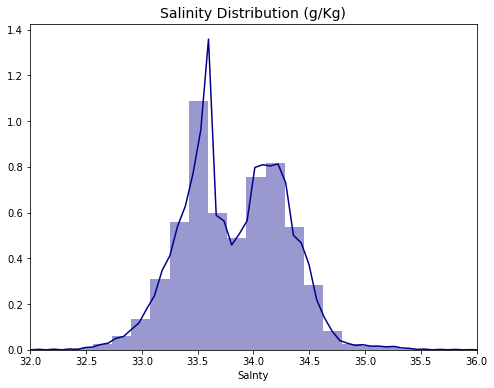

In [146]:
#  Salinity distribution
plt.figure(figsize=(8,6))
plt.xlim([32, 36])#  Salinity distribution
plt.title('Salinity Distribution (g/Kg)', fontsize=14)
sns.distplot(df['Salnty'], color='darkblue')

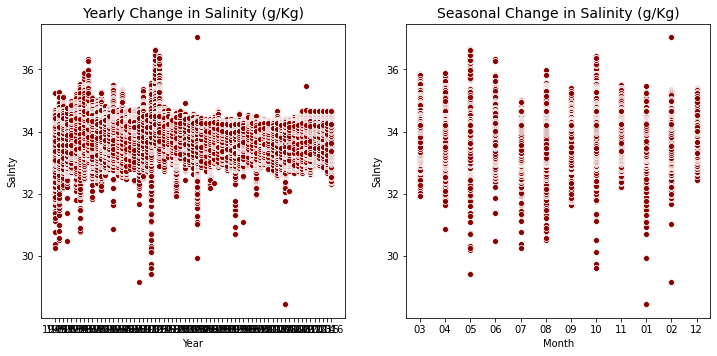

In [147]:
#  Yearly change in Salinity
fig = plt.figure(figsize=(12,6))
fig.autofmt_xdate()
fig.add_subplot(121)
plt.title('Yearly Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=df, x='Year', y='Salnty', color='darkred')

#  Seasonal change in Salinity
fig.add_subplot(122)
plt.title('Seasonal Change in Salinity (g/Kg)', fontsize=14)
sns.scatterplot(data=df, x='Month', y='Salnty', color='darkred')
plt.show()

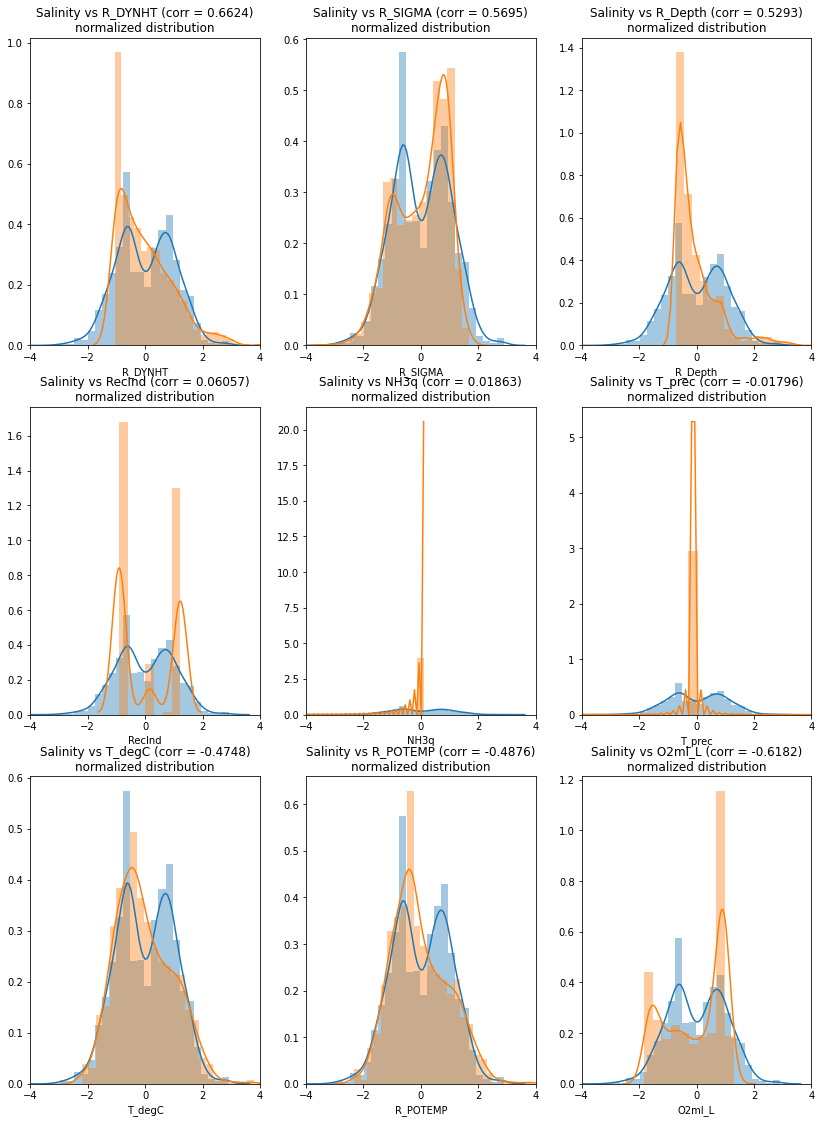

In [148]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(df_corr.Attributes)/col)
count = 1

for i, j in zip(df_plot.Attributes,df_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4})\nnormalized distribution'.format(i,j))
    plt.xlim(-4,4)
    sns.distplot(df_sample.Salnty)
    sns.distplot(df_sample[i])
    count = count + 1

plt.show()

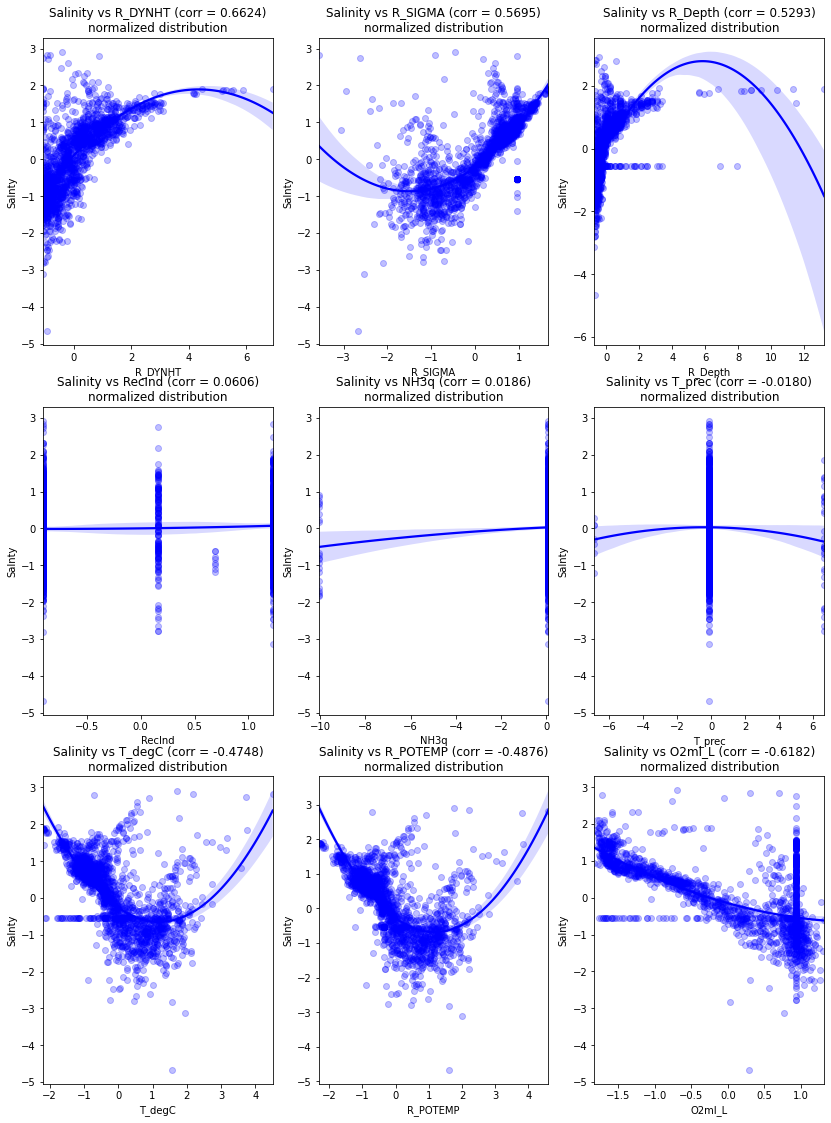

In [149]:
fig = plt.figure(figsize=(14,60))
col = 3
row  = int(len(df_corr.Attributes)/col)
count = 1

for i, j in zip(df_plot.Attributes,df_plot.Correlation):
    fig.add_subplot(row, col, count)
    plt.title('Salinity vs {} (corr = {:.4f})\nnormalized distribution'.format(i,j))
    sns.regplot(x=df_sample[i],y="Salnty",data=df_sample,order=2, scatter_kws={'alpha':0.25},color='blue');
    count = count + 1

plt.show()

In [150]:
dataset = df
dataset.head(2)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES,Year,Month
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,5.8,25.649,102.4,0.0,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.44,25.64,233.0,0.00,5.8,102.4,0,1949,03
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,5.8,25.656,102.4,0.0,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.44,25.65,232.5,0.01,5.8,102.4,8,1949,03


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       864863 non-null  float64
 6   Salnty       864863 non-null  float64
 7   O2ml_L       864863 non-null  float64
 8   STheta       864863 non-null  float64
 9   O2Sat        864863 non-null  float64
 10  Oxy_µmol/Kg  864863 non-null  float64
 11  RecInd       864863 non-null  int64  
 12  T_prec       864863 non-null  float64
 13  S_prec       864863 non-null  float64
 14  P_qual       864863 non-null  float64
 15  Chlqua       864863 non-null  float64
 16  Phaqua       864863 non-null  float64
 17  NH3q         864863 non-null  float64
 18  C14A1q       864863 non-

In [152]:
df.drop(['Sta_ID', 'Depth_ID', 'Year', 'Month'], axis=1, inplace=True)

In [153]:
df

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
0,1,1,0,10.500,33.4400,5.800,25.64900,102.40,0.00,3,1.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,10.50,10.50,33.440,25.640,233.0,0.000,5.80,102.4,0
1,1,2,8,10.460,33.4400,5.800,25.65600,102.40,0.00,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,10.46,10.46,33.440,25.650,232.5,0.010,5.80,102.4,8
2,1,3,10,10.460,33.4370,5.800,25.65400,102.40,0.00,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,10.46,10.46,33.437,25.650,232.8,0.020,5.80,102.4,10
3,1,4,19,10.450,33.4200,5.800,25.64300,102.40,0.00,3,2.0,2.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,19.0,10.45,10.45,33.420,25.640,234.1,0.040,5.80,102.4,19
4,1,5,20,10.450,33.4210,5.800,25.64300,102.40,0.00,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,20.0,10.45,10.45,33.421,25.640,234.0,0.040,5.80,102.4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,0,18.744,33.4083,5.805,23.87055,108.74,253.47,7,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,18.74,18.74,33.408,23.871,402.4,0.000,5.81,108.7,0
864859,34404,864860,2,18.744,33.4083,5.805,23.87072,108.74,253.47,3,2.0,3.0,9.0,9.0,9.0,4.0,9.0,9.0,9.0,9.0,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,108.7,2
864860,34404,864861,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3,2.0,3.0,9.0,9.0,9.0,4.0,9.0,9.0,9.0,9.0,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,5
864861,34404,864862,10,18.161,33.4062,5.816,24.01426,107.74,253.92,3,2.0,3.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,10


In [168]:
#Training
Y = dataset['T_degC']
x = dataset.drop(['T_degC','Cst_Cnt', 'Btl_Cnt'], axis=1)

In [169]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 8.423130220797659e-07
MAE (Mean Absolute Error) 0.00011660657547484275
r^2 score 0.9999999528980487
RMSE (Root Mean Squared Error) 0.0009177761285192407


In [170]:
#PowerTransformer yeo-johnson
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method='yeo-johnson', standardize=True)
X = yj.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 0.17829427610371562
MAE (Mean Absolute Error) 0.1649083952344986
r^2 score 0.9900298249037529
RMSE (Root Mean Squared Error) 0.4222490688014784


In [171]:
#QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=10)
X = qt.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 0.6435773194561486
MAE (Mean Absolute Error) 0.5554061610946549
r^2 score 0.9640113036538616
RMSE (Root Mean Squared Error) 0.8022327090415527


In [172]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 8.423130220802919e-07
MAE (Mean Absolute Error) 0.00011660657547591844
r^2 score 0.9999999528980487
RMSE (Root Mean Squared Error) 0.0009177761285195273


In [173]:
#MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X = mas.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 8.423130220794824e-07
MAE (Mean Absolute Error) 0.00011660657547863886
r^2 score 0.9999999528980487
RMSE (Root Mean Squared Error) 0.0009177761285190862


In [174]:
#RobustScaler
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X = rs.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 8.423130220793662e-07
MAE (Mean Absolute Error) 0.0001166065754717678
r^2 score 0.9999999528980487
RMSE (Root Mean Squared Error) 0.000917776128519023


In [175]:
# Menggunakan StandardScaler untuk berbagai metode
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.25, random_state=10) 

In [176]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
y_pred = forest_reg.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 4.49101455826228e-07
MAE (Mean Absolute Error) 0.00014362082335975612
r^2 score 0.9999999748863494
RMSE (Root Mean Squared Error) 0.0006701503233053223


In [177]:
#XGBoost
import xgboost as xgb
# from xgboost import XGBRFRegressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimator =100)
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Mean Squared Error) 0.00010753619003418215
MAE (Mean Absolute Error) 0.00712635146417271
r^2 score 0.9999939866008755
RMSE (Root Mean Squared Error) 0.01036996576822615


In [ ]:
#KNNRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2) #n=2 mendapat nilai rmse terkecil
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error)', np.sqrt(mean_squared_error(y_test, y_pred)))